In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/personal-key-indicators-of-heart-disease/2020/heart_2020_cleaned.csv
/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_with_nans.csv
/kaggle/input/personal-key-indicators-of-heart-disease/2022/heart_2022_no_nans.csv


In [2]:
#!pip install imbalanced-learn
#!pip install dython
#Eğer sizde yüklü değilse başındaki '#' işaretini silin

#  -------------
#Kütüphanemizi yüklüyoruz
#Eğer ilk çalıştığında kütüphane import kısmı hata verirse sağ yukarıda buluna 3 noktaya basıp
#Oradan Kernelimize restart atalım sonrasında düzeliyor.

# Proje Amacı

Bu projede **kalp hastalığı riskini tahmin etmek** amacıyla “Heart Disease” veri setini kullanıyorum. Amacım, makine öğrenmesi modelleriyle verideki örüntüleri yakalayıp “hasta” ve “sağlıklı” gruplarını en doğru şekilde sınıflandırmak.

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import SMOTE
from dython.nominal import associations

import warnings
warnings.filterwarnings('ignore')

- **`seaborn as sns`** ve **`matplotlib.pyplot as plt`**  
  Veri görselleştirmeleri ve istatistiksel grafikler için.

- **`pandas as pd`**  
  Veri okuma, yazma ve DataFrame işlemleri için.

- **`numpy as np`**  
  Sayısal hesaplama ve yüksek performanslı dizi işlemleri için.

- **`OrdinalEncoder`, `StandardScaler`**  
  Kategorik verileri sayı kodlarına çevirmek ve sayısal özellikleri ölçeklendirmek için.

- **`train_test_split`**  
  Veriyi eğitim ve test setlerine bölmek için.

- **`associations`** (`dython.nominal`)  
  Kategorik değişkenler arasındaki ilişkileri (korelasyonları) hesaplamak ve görselleştirmek için.

- **`classification_report`, `precision_score`, `recall_score`, `f1_score`**  
  Model performansını detaylıca değerlendirmek için.

- **`RandomForestClassifier`**  
  Birden çok karar ağacından oluşan ansamble (orman) modeli oluşturmak için.

- **`Pipeline`** (`imblearn.pipeline`)  
  Ön işleme adımlarını (örn. SMOTE) model eğitim sürecine entegre etmek için.

- **`SMOTE`** (`imblearn.over_sampling`)  
  Azınlık sınıfını çoğaltarak eğitim setini dengelemek için.

- **`XGBClassifier`**  
  XGBoost gradyan artırma algoritması ile model oluşturmak için.

- **`BalancedRandomForestClassifier`**  
  Dengesiz veri üzerinde otomatik alt-örnekleme yaparak rastgele orman modeli eğitmek için.  


In [4]:
df = pd.read_csv('/kaggle/input/personal-key-indicators-of-heart-disease/2020/heart_2020_cleaned.csv')

In [5]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

- Veri tablomuzu incelediğimizde df.info() bize tam 319.795 satır ve 18 sütundan oluştuğunu gösteriyor.
- Tek bir satırda bile eksik veri bulunmadığını görüyoruz.
- Dört sütunun sayısal (BMI, PhysicalHealth, MentalHealth, SleepTime), geri kalan on dört sütunun ise (örneğin Smoking, Sex, Race, Diabetic, GenHealth gibi) kategorik bilgiler barındırdığını görüyoruz.
- Bu da demek oluyor ki verimiz temizlik bakımından eksiksiz, ancak makine öğrenmesi modellerini uygulamadan önce kategorik değişkenleri uygun şekilde sayısala çevirmemiz gerekli (encoding).
- Sayısal sütunları ise ölçek farklarını yok etmek için standartlaştırmamız veya normalleştirmemiz gerekiyor.

In [7]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


## BMI: 
- Vücut kitle indeksi değeri ortalama 28,3 çıkıyor, bu da katılımcıların büyük bir kısmının “fazla kilolu” (25–29,9) aralığında olduğunu gösteriyor.
- Dağılımın standart sapması yaklaşık 6,4 olması, bir yandan normal kiloda, diğer yandan ciddi obezite düzeylerinde bireylerin de bulunduğunu işaret ediyor.
- En düşük gözlemde BMI 12’ye kadar iniyor, En yüksek değer de ise 94.85'e kadar çıkıyor. Bu değerler aşırı zayıf profiller veya aşırı kilolu bireyleri işaret ediyor, büyük ihtimalle veri girişi hatalarından dolayı çünkü bu değerlere sahip insanların olması imkansız gibi, bu yüzden aşırı uç değerleri inceleyeceğiz.
- Üst yüzde 75 sınırı 31,4 ile obezite eşiğindeki bireyleri tanımlıyor. Makine öğrenmesi modellerinde BMI’nin farklı ölçekleri

## Physical Health
- Data setin sayfasında bu sütunun açıklmasında "Son 30 gün içinde fiziksel sağlığınızın iyi olmadığı gün sayısı" olarak geçiyor.
- “Son 30 gündeki kötü geçen fiziksel sağlık günü” sayısının medyanı (50% değeri) ve alt çeyrek değerleri 0 olarak çıkıyor;
yani katılımcıların yarısından fazlası fiziksel olarak hiç sorun yaşamadığını raporlamış.
- Buna karşın üst yüzde 75’teki değer 2 gün, maksimum ise 30 gün, bazı bireylerin tüm ay boyunca rahatsızlık bildirdiğini görüyoruz.

## Mental Health
- Zihinsel sağlık sorunları için de durum benzer: Medyan ve alt çeyrek 0 gün, üst çeyrek ortalaması 3 gün; yani çoğunluk hiçbir sorun yaşamamış, ancak bir grup katılımcı ayın birkaç gününü ruhsal sıkıntıyla geçirmiş.
- Ortalama yaklaşık 3,9 gün olması, zihinsel sağlığın fiziksele kıyasla biraz daha yoğun raporlandığını gösteriyor. Standart sapma yaklaşık 8 gün gibi yüksek bir değer; bu da dağılımın uç değerlere açık olduğunu doğruluyor.
- Modelleme aşamasında MentalHealth değerlerinin etkisini anlamak için önce dağılımı görselleştirecek, sonra gerekirse kategorik sınıflandırmaya (örneğin “0 gün”, “1–7 gün”, “8+ gün”) yönelmeyi düşüneceğiz.

## Sleep Time
- Ortalama uyku süresi 7,1 saat, medyan 7 ve çeyrekler 6 ile 8 saat arasında yer alıyor,
- Ancak minimum 1 ve maksimum 24 saat kayıtlarda yer alıyor; bu aşırı uçlar muhtemelen veri hatası veya olağanüstü durumlar, uç değerlere dikkat etmeliyiz. Uç değerleri temizlemeyi düşünebiliriz.

## Şimdi bu değerleri detaylı inceleyelim
- Öncelikle BMI'ı ele alalım ve grafiklerle daha iyi anlaşılır hale getirmeye çalışalım.

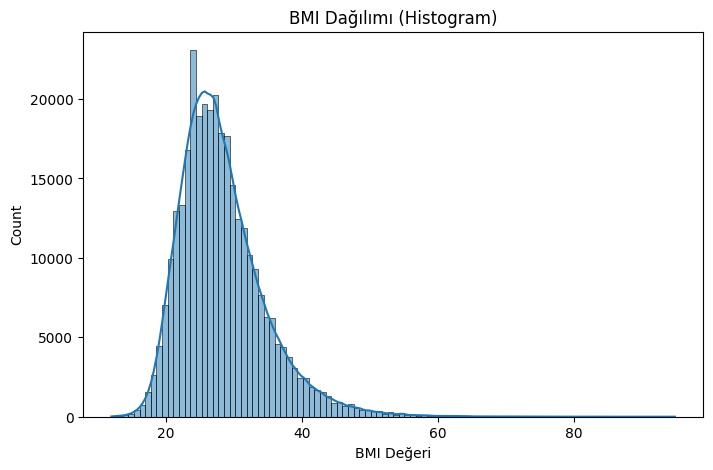

In [8]:
# Histogram'ı çizelim
plt.figure(figsize=(8, 5))
sns.histplot(
    data=df,        # Veri kaynağı
    x="BMI",        # Sayısal değişken
    bins=100,       # Toplam kaç dikdörtgen yaptığının sayısı
    kde=True,        # Yoğunluk eğrisi ekleme
)
plt.title("BMI Dağılımı (Histogram)")
plt.xlabel("BMI Değeri")
plt.ylabel("Count")
plt.show()

- Elimizdeki BMI histogramı, çoğu bireyin 20–35 aralığında yoğunlaştığı ancak sağa doğru uzun bir kuyruk oluştuğunu gösteriyor. Özellikle 55-60'tan sonra çok az sayıda girdi var.

- Alt uçlarda (12–15) ve üst uçlarda (60–90+) çok az sayıda gözlem bulunması, olası veri girişi hatalarını veya nadir aşırı vakaları 

- Bu yapı, makine öğrenmesi modellerine beslemeden önce uç değer kontrolü ihtiyacını doğuruyor.



<Axes: >

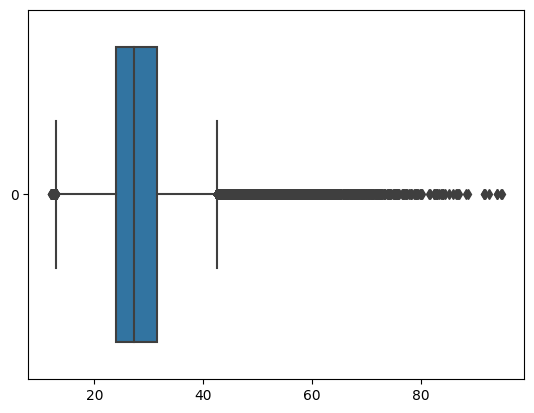

In [9]:
sns.boxplot(data=df["BMI"], orient="h")

- Baskın dağılım 24–31 aralığında, medyan ~27 civarında ve verinin çoğu bu çerçevede yer alıyor.

- 45’nin üstündeki değerler büyük çoğunlukla uç değer; modelimizi yanıltmaması için bu noktaları sınırlandırmak, dönüştürmek veya çıkararak temizlemek gerekiyor.

In [10]:
#IQR hesaplama
Q1  = df['BMI'].quantile(0.25)
Q3  = df['BMI'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR



# df üzerinden uç değerleri silelim
df = df[(df['BMI'] >= lower_bound) & (df['BMI'] <= upper_bound)]

print(f"Q1  = {Q1:.2f}")
print(f"Q3  = {Q3:.2f}")
print(f"IQR = {IQR:.2f}")
print(f"Lower bound = {lower_bound:.2f}")
print(f"Upper bound = {upper_bound:.2f}")

Q1  = 24.03
Q3  = 31.42
IQR = 7.39
Lower bound = 12.95
Upper bound = 42.51


**IQR Tabanlı Uç Değer Temizliği**  
İlk olarak BMI sütununun 1. (Q1) ve 3. (Q3) çeyrek değerlerini hesapladım ve bu değerler arasındaki farkı IQR olarak tanımladım. Ardından alt sınırı Q1 - 1.5 * IQR, üst sınırı Q3 + 1.5 * IQR formülüyle belirledim. Son olarak, orijinal df’i yalnızca bu alt ve üst sınırlar arasında kalan BMI gözlemlerini içerecek şekilde filtreledim. Bu sayede gerçekçi olmayan çok düşük ya da çok yüksek BMI değerlerini veri setinden çıkararak model için daha temiz ve güvenilir bir veri elde etmiş oldum. Şimdi boxplot grafiğimize tekrardan bakalım.


<Axes: >

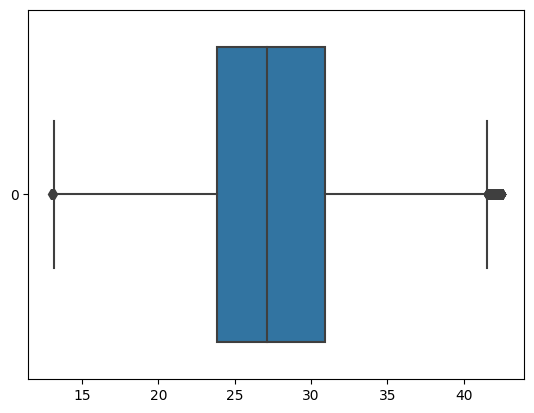

In [11]:
sns.boxplot(data=df["BMI"], orient="h")

**IQR tabanlı filtreleme sonrası BMI Boxplot yorumum**  

- Orijinal veri üzerinde yaptığım Q1 = 24.03, Q3 = 31.42 ve IQR = 7 .39 değerlerine göre alt sınırımı 12,95, üst sınırımı 42,51 olarak belirledim ve bu sınırların dışındaki çok uç (< 12,95 veya > 42,51) BMI kayıtlarını veri setinden çıkardım. Yeni boxplot’ta medyan hala yaklaşık 27,3, kutu Q1–Q3 (24.03 – 31.42) arasını gösteriyor ve whisker’lar yine Q1 – 1.5×IQR (12,95) ile Q3 + 1.5×IQR (42,51) sınırlarında kaldı.

- Grafikte bu whisker sınırlarının dışındaki noktalar hala uç değer (outlier) olarak işaretlenmiş görünüyor. Bu tamamen normal; çünkü boxplot her zaman elindeki (filtrelenmiş) verinin kendi IQR’ına dayanarak 1.5×IQR dışındaki gözlemleri outlier sayar. İlk filtrelemede gerçekten çok uç (örneğin BMI > 60–90) değerleri çıkarmış oldum, ama kalan veri üzerinden yeniden hesaplanan whisker sınırları yine orta düzey uç noktalar (≈ 13’ün altı veya ≈ 42’nin üstü) üretmiş.


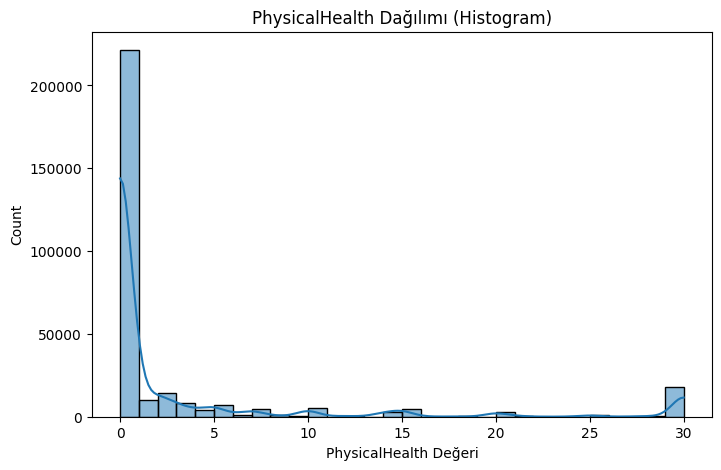

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(
    data=df,                   # Veri kaynağı
    x="PhysicalHealth",        # Sayısal değişken
    bins=30,                   # Toplam kaç dikdörtgen yaptığının sayısı
    kde=True,                  # Yoğunluk eğrisi ekleme
)
plt.title("PhysicalHealth Dağılımı (Histogram)")
plt.xlabel("PhysicalHealth Değeri")
plt.ylabel("Count")
plt.show()

**PhysicalHealth Dağılımı Açıklaması**  
Bu kod bloğunda PhysicalHealth sütununun son 30 gündeki kötü fiziksel sağlık günlerini hem histogram hem de yoğunluk eğrisiyle inceledim. Grafikte:

- Çubukların büyük kısmı 0 değerine odaklanmış; bu da katılımcıların çoğunun son ay boyunca hiçbir fiziksel rahatsızlık yaşamadığını gösteriyor.  
-  1–5 gün aralığında hızlı bir düşüş, ardından nadir de olsa 10–30 gün aralığında düşük frekanslı gözlemler var. Yani verinin küçük bir kısmı birkaç gün boyunca şikayet kaydetmiş.  
- Uç değerler, 30 gün gibi maksimum değere ulaşan kayıtlar mevcut, bu aşırı uçları modelde doğrudan kullanmak yerine ya kategorize ederek (“0 gün”, “1–7 gün”, “8+ gün”) işlemeyi tercih edeceğim.
 

In [13]:
# Kategori sınırları ve etiketler
bins   = [-1, 0, 7, df['PhysicalHealth'].max()]
labels = ['0 days','1-7 days','8+ days']

# Kategorik sütunu oluştur
df['PhysicalHealth'] = pd.cut(df['PhysicalHealth'], bins=bins, labels=labels)

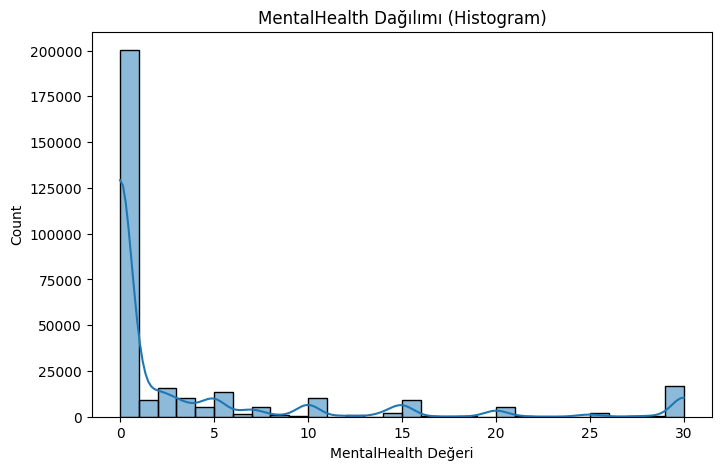

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(
    data=df,                 # Veri kaynağı
    x="MentalHealth",        # Sayısal değişken
    bins=30,                 # Toplam kaç dikdörtgen yaptığının sayısı
    kde=True,                # Yoğunluk eğrisi ekleme
)
plt.title("MentalHealth Dağılımı (Histogram)")
plt.xlabel("MentalHealth Değeri")
plt.ylabel("Count")
plt.show()

**MentalHealth Dağılımı Açıklaması**  
Bu kod bloğunda MentalHealth sütununun son 30 gündeki kötü geçen ruh sağlığı günlerini histogram ile inceledim. 

- Çubukların çok büyük bölümü 0 değerine odaklanmış; bu da katılımcıların çoğunun hiç zihinsel sağlık sorunu yaşamadığını gösteriyor.  
- 1–5 gün aralığında frekans hızla düşüyor, ardından 5–15 gün aralığında düşük ama gözlemlenebilir sayıda kayıt var.  
- 20 gün ve üzeri değerler az sayıda olsa da mevcut, bu da bazı katılımcıların ayın büyük kısmında ciddi ruhsal sıkıntı bildirdiğini işaret ediyor.  
- Maksimum 30 gün raporu aşırı uç kabul edilebilir; bu kayıtları ya kategoriye ('0-10 days', '10-25 days', '25-30 days') şeklinde ayıracağım.)

In [15]:
bins   = [-1, 10, 25, 30]
labels = ['0-10 days', '10-25 days', '25-30 days']

df['MentalHealth'] = pd.cut(df['MentalHealth'], bins=bins, labels=labels, include_lowest=True
)

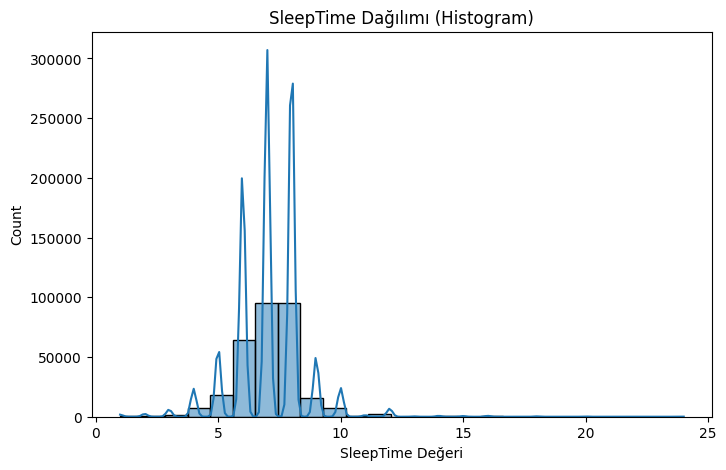

In [16]:
plt.figure(figsize=(8, 5))
sns.histplot(
    data=df,                   # Veri kaynağı
    x="SleepTime",             # Sayısal değişken
    bins=25,                   # Toplam kaç dikdörtgen yaptığının sayısı
    kde=True,                  # Yoğunluk eğrisi ekleme
)
plt.title("SleepTime Dağılımı (Histogram)")
plt.xlabel("SleepTime Değeri")
plt.ylabel("Count")
plt.show()

<Axes: >

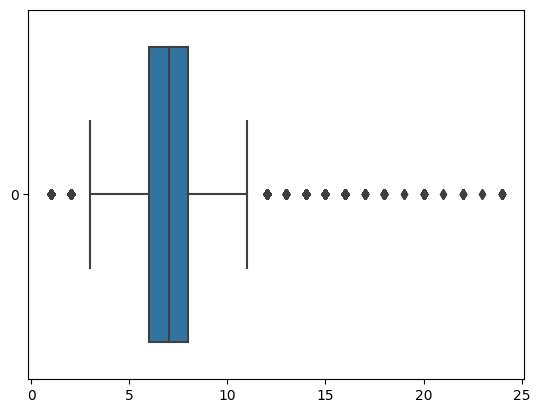

In [17]:
sns.boxplot(data=df["SleepTime"], orient="h")

**SleepTime Dağılımı Açıklaması**  
Bu kod bloğunda `SleepTime` sütununun günlük uyku süresini hem histogram hem de boxplot ile inceledim. 

-  Çubukların büyük bölümü 6–8 saat aralığında toplanmış; katılımcıların çoğu günde yaklaşık 7 saat uyuyor.    
- Alt uçlar (1–4 saat): Çok az sayıda kişi 4 saatin altında uyumuş; bu değerler veri giriş hatası olabileceği gibi gerçekten kısa uyku düzeni de temsil edebilir.  
- Üst uçlar (10–24 saat): 10 saatin üstündeki nadir kayıtlar mevcut; bunlar da uç değer olarak kabul edilebilir.  

Özetle, SleepTime değişkeni tipik uyku süresi etrafında toplanmış ancak bazı gerçek dışı veya uç değerler içeriyor. Modelde daha sağlıklı sonuçlar almak için bu uç değerleri ya mantıklı gruplara ayıracak (“5 saat altı”, “6–8 saat”, “9 saat ve üstü”) diye ayıracağım.  


In [18]:
# Kategori sınırları ve etiketleri belirliyorum
bins   = [0, 5, 8, df['SleepTime'].max()]
labels = ['5 saat altı', '6–8 saat', '9 saat ve üstü']

# Yeni kategorik sütunu oluşturuyorum.
df['SleepTime'] = pd.cut(df['SleepTime'],bins=bins,labels=labels,include_lowest=True)

## Artık BMI hariç sadece kategorik değişkenler var elimizde.
- Şimdi kategorik değişkenlerimizin içerisindeki kategorilerin hepsine bir bakalım.

In [19]:
# BMI hariç tüm kategorik sütunların unique değerlerini yazdırıyorum.
for col in df.drop(columns='BMI').columns:
    unique_vals = df[col].unique().tolist()
    print(f"{col} : {unique_vals}")

HeartDisease : ['No', 'Yes']
Smoking : ['Yes', 'No']
AlcoholDrinking : ['No', 'Yes']
Stroke : ['No', 'Yes']
PhysicalHealth : ['1-7 days', '0 days', '8+ days']
MentalHealth : ['25-30 days', '0-10 days', '10-25 days']
DiffWalking : ['No', 'Yes']
Sex : ['Female', 'Male']
AgeCategory : ['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74', '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29']
Race : ['White', 'Black', 'Asian', 'American Indian/Alaskan Native', 'Other', 'Hispanic']
Diabetic : ['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)']
PhysicalActivity : ['Yes', 'No']
GenHealth : ['Very good', 'Fair', 'Good', 'Poor', 'Excellent']
SleepTime : ['5 saat altı', '6–8 saat', '9 saat ve üstü']
Asthma : ['Yes', 'No']
KidneyDisease : ['No', 'Yes']
SkinCancer : ['Yes', 'No']


**One-Hot Encoding (İkili Kategorik Sütunlar)**  
Aşağıdaki sütunlar yalnızca “Yes” ve “No” değerleri içeriyor:  
'HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',  
'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer'  

Bu ikili kategorik değişkenleri makine öğrenmesi modellerine uygun hale getirmek için One-Hot Encoding uygulayacağız. Her sütun için “No” ve “Yes” değerlerine karşılık ayrı sütunlar oluşturulacak

In [20]:
# One-Hot Encoding uygulanacak sütun listesini tanımlıyoruz
binary_cols = [
    'HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
    'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer'
]

# One-Hot Encoding işlemini yapıyorum.
df = pd.get_dummies(df, columns=binary_cols, drop_first=True)
df

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,Diabetic,GenHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,16.60,1-7 days,25-30 days,55-59,White,Yes,Very good,5 saat altı,False,True,False,False,False,False,True,True,False,True
1,20.34,0 days,0-10 days,80 or older,White,No,Very good,6–8 saat,False,False,False,True,False,False,True,False,False,False
2,26.58,8+ days,25-30 days,65-69,White,Yes,Fair,6–8 saat,False,True,False,False,False,True,True,True,False,False
3,24.21,0 days,0-10 days,75-79,White,No,Good,6–8 saat,False,False,False,False,False,False,False,False,False,True
4,23.71,8+ days,0-10 days,40-44,White,No,Very good,6–8 saat,False,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319789,22.22,0 days,0-10 days,18-24,Hispanic,No,Excellent,6–8 saat,False,False,False,False,False,False,True,False,False,False
319790,27.41,1-7 days,0-10 days,60-64,Hispanic,Yes,Fair,6–8 saat,True,True,False,False,True,True,False,True,False,False
319791,29.84,0 days,0-10 days,35-39,Hispanic,No,Very good,5 saat altı,False,True,False,False,False,True,True,True,False,False
319792,24.24,0 days,0-10 days,45-49,Hispanic,No,Good,6–8 saat,False,False,False,False,False,False,True,False,False,False


In [21]:
# Yaş aralıklarının ortalamaları için mapping sözlüğü oluşturdum.
age_mapping = {
    '18-24': 21,
    '25-29': 27,
    '30-34': 32,
    '35-39': 37,
    '40-44': 42,
    '45-49': 47,
    '50-54': 52,
    '55-59': 57,
    '60-64': 62,
    '65-69': 67,
    '70-74': 72,
    '75-79': 77,
    '80 or older': 80
}

# Yeni oluşturudğumuz sütunu eski sütunumuzun üstüne yazıyorum.
df['AgeCategory'] = df['AgeCategory'].map(age_mapping).astype(int)


- Kategorik yaş gruplarını tek bir sayısal sütunda topladım; böylece hem veri boyutunu küçülttüm hem de modellerde ek sütunlara gerek bırakmadım.  
- Her aralığa karşılık gelen ortalama değer (ör. “55–59” → 57) kullanarak yaş büyüdükçe artan risk profilini korunmuş hale getirdim.    
- Manuel mapping ile mantıklı ve gerçekçi sayılar belirlediğim için “25–29” ile “80 or older” arasındaki farkı olması gerektiği gibi yansıttım.    


df

In [22]:
#Aşağıdaki döngü sayesinde her bir sütunun içinde bulunan değerleri görebiliyoruz.
for col in df.drop(columns='BMI').columns:
    unique_vals = df[col].unique().tolist()
    print(f"{col} : {unique_vals}")

PhysicalHealth : ['1-7 days', '0 days', '8+ days']
MentalHealth : ['25-30 days', '0-10 days', '10-25 days']
AgeCategory : [57, 80, 67, 77, 42, 72, 62, 52, 47, 21, 37, 32, 27]
Race : ['White', 'Black', 'Asian', 'American Indian/Alaskan Native', 'Other', 'Hispanic']
Diabetic : ['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)']
GenHealth : ['Very good', 'Fair', 'Good', 'Poor', 'Excellent']
SleepTime : ['5 saat altı', '6–8 saat', '9 saat ve üstü']
HeartDisease_Yes : [False, True]
Smoking_Yes : [True, False]
AlcoholDrinking_Yes : [False, True]
Stroke_Yes : [False, True]
DiffWalking_Yes : [False, True]
Sex_Male : [False, True]
PhysicalActivity_Yes : [True, False]
Asthma_Yes : [True, False]
KidneyDisease_Yes : [False, True]
SkinCancer_Yes : [True, False]


- Şimdi geriye düzenlememiz gereken PhysicalHealth, MentalHealth, GenHealth, Race, Diabetic, SleepTime özellikleri kaldı sadece.
- Buradaki sütunlar içerisinde Race'de ordina encoding yapmam hatalı olabilir çünkü ırkları bir sıraya sokmuş olacağım böylece öğrenmede bozukluğa sebep verebilirim bu yüzden One-Hot Encoding en yaygın ve güvenli yöntem olacaktır.
- PhysicalHealth, MentalHealth, SleepTime, GenHealth için ise bir ordianl encoding uygulayacağım.

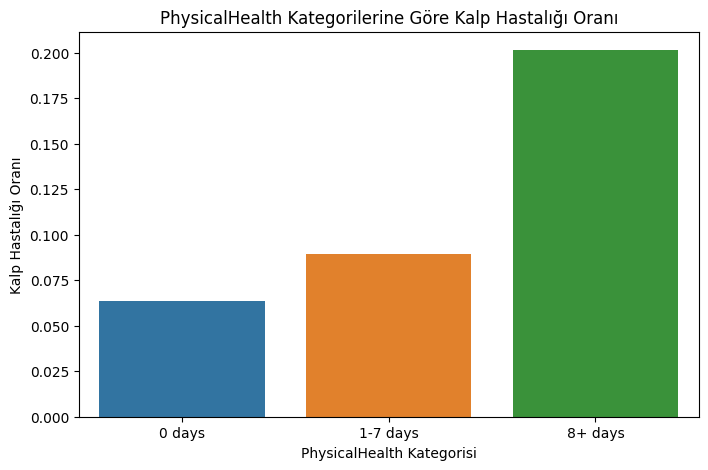

In [23]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x='PhysicalHealth',       
    y='HeartDisease_Yes',     
    data=df,
    ci=None
)
plt.title('PhysicalHealth Kategorilerine Göre Kalp Hastalığı Oranı')
plt.xlabel('PhysicalHealth Kategorisi')
plt.ylabel('Kalp Hastalığı Oranı')
plt.show()

**PhysicalHealth Kategorilerine Göre Kalp Hastalığı Oranı Analizi**  
Grafikte her bir PhysicalHealth kategorisinde kalp hastalığı görülme oranını (HeartDisease_Yes ortalamasını) inceledim ve şu sonuçları elde ettim:

- **0 days**: Fiziksel rahatsızlık yaşamayanlarda kalp hastalığı oranı ~6 % civarında.  
- **1–7 days**: Ayda 1–7 gün arası rahatsızlık yaşayanlarda oran ~9 %’a yükseliyor.  
- **8+ days**: Ayın büyük çoğunluğunu rahatsız geçirende oran ~20 %’yi aşıyor.  

Bu net artış eğrisi, fiziksel sağlıkta geçirilen kötü gün sayısının kalp hastalığı riskini doğrudan yükselttiğini gösteriyor. Özellikle “8+ days” grubundaki keskin sıçrama, ağır fiziksel şikâyeti olan bireylerin risk altındaki en kritik grup olduğunu vurguluyor.

---

**Ordinal Encoding Sıralamamın Gerekçesi**  
PhysicalHealth’i sıralarken, “en iyi durumu” (0 days) en düşük kodla, “orta durum”u (1–7 days) ortadaki kodla, “en kötü durumu” (8+ days) en yüksek kodla eşleştirdim:  
```python
phys_order = ['0 days', '1–7 days', '8+ days']


In [24]:
# 1) PhysicalHealth için doğal sıralamayı tanımladık
phys_order = ['0 days', '1-7 days', '8+ days']

# 2) OrdinalEncoder nesnesini oluştur ve yalnızca bu sütun için uygulyoruz
encoder = OrdinalEncoder(categories=[phys_order], dtype=int)

# 3) PhysicalHealth sütununu encoding işlemini yapıyoruz
df['PhysicalHealth'] = encoder.fit_transform(df[['PhysicalHealth']])


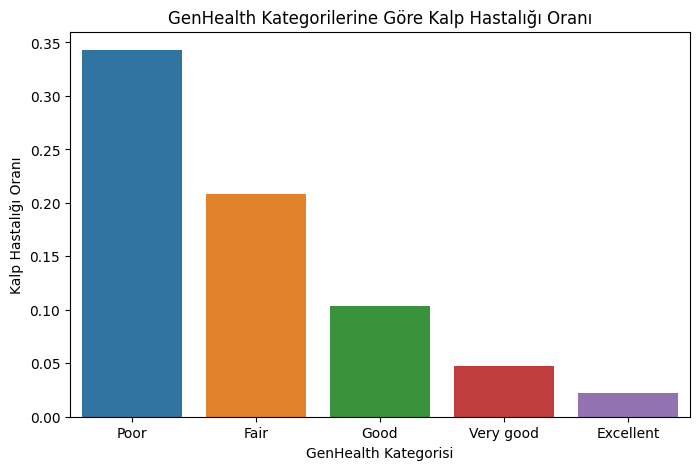

In [25]:
plt.figure(figsize=(8, 5))
sns.barplot(
x='GenHealth', # Poor → Fair → Good → Very good → Excellent
y='HeartDisease_Yes', # Kalp hastalığı oranı
data=df,
order=['Poor','Fair','Good','Very good','Excellent'],
ci=None
)
plt.title('GenHealth Kategorilerine Göre Kalp Hastalığı Oranı')
plt.xlabel('GenHealth Kategorisi')
plt.ylabel('Kalp Hastalığı Oranı')
plt.show()

**GenHealth Kategorilerine Göre Kalp Hastalığı Oranı Analizi**  
Grafikte GenHealth’in her bir düzeyi için kalp hastalığı oranını incelediğimde şu sonuçlara ulaştım:

- **Poor** grubunda kalp hastalığı oranı yaklaşık %34-35 düzeyinde.  
- **Fair** grubunda oran %20 civarına geriliyor.  
- **Good** kategorisinde %10,  
- **Very good**’da %5’e ve  
- **Excellent**’da ise %2’ye kadar düşüyor.  

Bu net düşüş, GenHealth iyileştikçe kalp hastalığı riskinin düzenli biçimde azaldığını gösteriyor. Yani “Excellent” kategorisi gerçekten en sağlıklı durum ve en düşük risk grubunu temsil ediyor.

---

**OrdinalEncoder Sıralamamın Gerekçesi**  
GenHealth’i encode ederken listeyi şu şekilde tanımladım:
```python
gen_order = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']


In [26]:
# GenHealth için sıralamayı tanımlıyoruz.
gen_order = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']

# 2) OrdinalEncoder nesnesini oluşturuyoruz ve yalnızca bu sütun için uyguluyoruz.
encoder = OrdinalEncoder(categories=[gen_order], dtype=int)

df['GenHealth'] = encoder.fit_transform(df[['GenHealth']])

GenHealth sütununda bir hiyerarşi olduğu için bu sütuna OrdinalEncodering yaptık. 
- Excellent : 0
- Very good: 1
- Good : 2
- Fair : 3
- Poor : 4 olacak şeklinde düzenledik

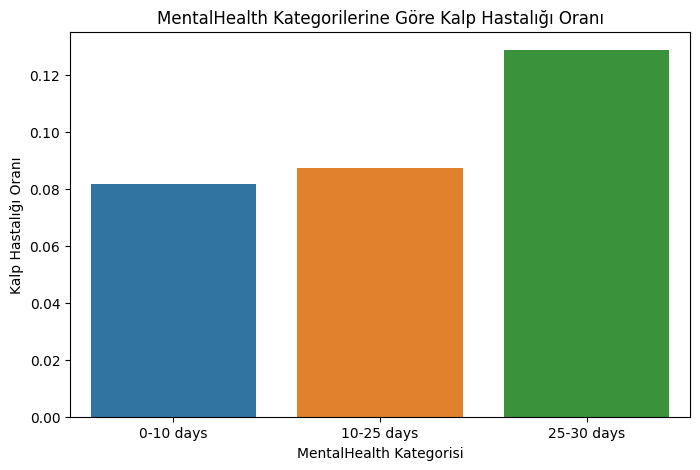

In [27]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x='MentalHealth',         
    y='HeartDisease_Yes',     # Kalp hastalığı oranı
    data=df,
    order=['0-10 days', '10-25 days', '25-30 days'],
    ci=None
)
plt.title('MentalHealth Kategorilerine Göre Kalp Hastalığı Oranı')
plt.xlabel('MentalHealth Kategorisi')
plt.ylabel('Kalp Hastalığı Oranı')
plt.show()

In [28]:
# 1) PhysicalHealth için doğal sıralamayı tanımla
mental_order = ['0-10 days', '10-25 days', '25-30 days']

# 2) OrdinalEncoder nesnesini oluştur ve yalnızca bu sütun için uygula
encoder = OrdinalEncoder(categories=[mental_order], dtype=int)

# 3) PhysicalHealth sütununu encode et
df['MentalHealth'] = encoder.fit_transform(df[['MentalHealth']])

**MentalHealth Gruplarına Göre Kalp Hastalığı Oranı (0–10, 10–25, 25–30 gün)**  
Yeniden grupladığım MentalHealth kategorileriyle kalp hastalığı oranına baktığımda:

- **0–10 days** grubunda oran yaklaşık 8%  
- **10–25 days** grubunda oran yaklaşık 9%  
- **25–30 days** grubunda oran yaklaşık 13%  

Gördüğüm üzere, 0–10 ve 10–25 gün aralığındaki iki hafif/orta grup arasında risk neredeyse eşitken; 25–30 gün aralığında risk anlamlı şekilde yükseliyor.

---

**OrdinalEncoder Sıralamamın Gerekçesi**   
– OrdinalEncoder’ı kullandığımda kategorilerin belirlediğim sıraya göre göre 0→1→2 değerlerini atadı:  
  - 0-10 days → 0  
  - 10-25 days → 1  
  - 25-30 days → 2  

– Bu sırayı tercih etmemin sebebi, kodun artışıyla riskin artışını aynı yönde eşleştirmekti. Yani en düşük riskli grubu (0–10 days) kod olarak da en küçük (0), en yüksek riskli grubu (25–30 days) en büyük (2) değerde tutarak model ve grafik yorumlamasında tutarlılık sağladım.  


In [29]:
df

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,Diabetic,GenHealth,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
0,16.60,1,2,57,White,Yes,1,5 saat altı,False,True,False,False,False,False,True,True,False,True
1,20.34,0,0,80,White,No,1,6–8 saat,False,False,False,True,False,False,True,False,False,False
2,26.58,2,2,67,White,Yes,3,6–8 saat,False,True,False,False,False,True,True,True,False,False
3,24.21,0,0,77,White,No,2,6–8 saat,False,False,False,False,False,False,False,False,False,True
4,23.71,2,0,42,White,No,1,6–8 saat,False,False,False,False,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319789,22.22,0,0,21,Hispanic,No,0,6–8 saat,False,False,False,False,False,False,True,False,False,False
319790,27.41,1,0,62,Hispanic,Yes,3,6–8 saat,True,True,False,False,True,True,False,True,False,False
319791,29.84,0,0,37,Hispanic,No,1,5 saat altı,False,True,False,False,False,True,True,True,False,False
319792,24.24,0,0,47,Hispanic,No,2,6–8 saat,False,False,False,False,False,False,True,False,False,False


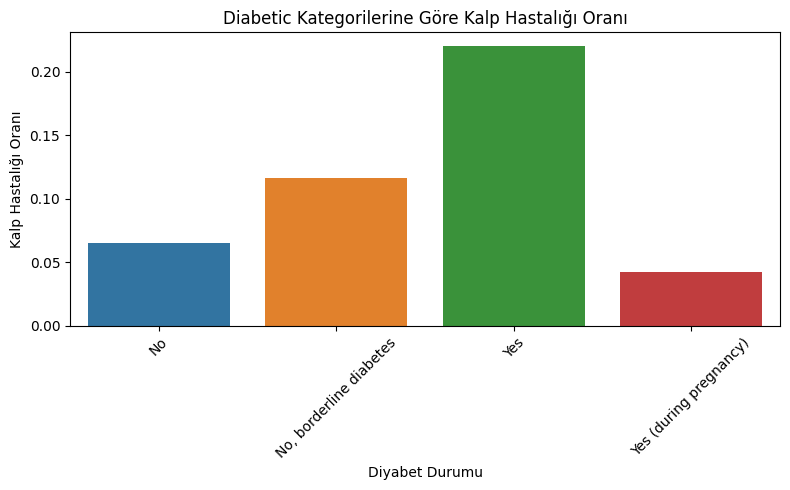

In [30]:
plt.figure(figsize=(8, 5))
order = ['No', 'No, borderline diabetes', 'Yes', 'Yes (during pregnancy)']
sns.barplot(
    x='Diabetic',
    y='HeartDisease_Yes',
    data=df,
    order=order,
    ci=None
)
plt.title('Diabetic Kategorilerine Göre Kalp Hastalığı Oranı')
plt.xlabel('Diyabet Durumu')
plt.ylabel('Kalp Hastalığı Oranı')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
df['Diabetic'] = df['Diabetic'].replace({'Yes (during pregnancy)': 'No'})

**Yes, (during pregnancy) kategorisi sadece hamilelikte kısa bir dönem de oludğu için ve oran olarak da no kategorisine yakın olduğu için o kategorinin içerisine katıyorum**

In [32]:
df = pd.get_dummies(df, columns=['Diabetic'], drop_first=True)

**Diabetic Sütununa One-Hot Encoding Uygulaması**  
Ben pd.get_dummies(df, columns=['Diabetic'], drop_first=True) komutuyla “Diabetic” sütununu one-hot encode uyguladım. drop_first=True parametresi sayesinde referans (ilk) kategori olarak “No”yu bıraktım ve kalan iki kategori için ayrı 0/1 sütunları oluşturdum.

**Şimdi sadece işlenmesi gereken Race ve SleepTime kolonu kaldı bu sütunları da makine öğrenmesi için hazır hale getirelim**

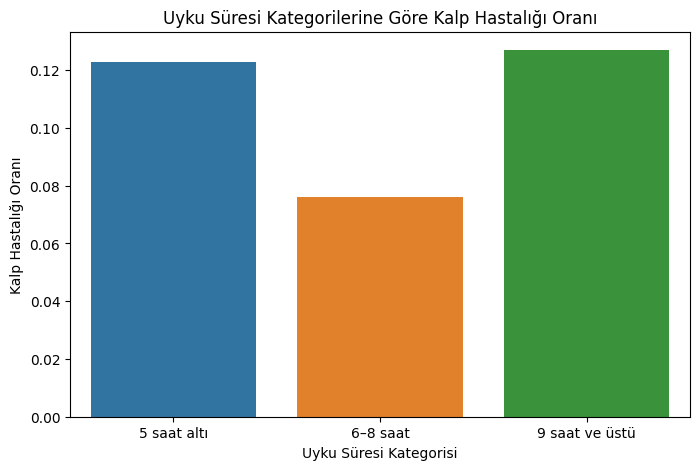

In [33]:
# Barplot — SleepTime kategorilerine göre kalp hastalığı oranı
plt.figure(figsize=(8, 5))
order = ['5 saat altı', '6–8 saat', '9 saat ve üstü']
sns.barplot(
    x='SleepTime',       
    y='HeartDisease_Yes',
    data=df,
    order=order,
    ci=None
)
plt.title('Uyku Süresi Kategorilerine Göre Kalp Hastalığı Oranı')
plt.xlabel('Uyku Süresi Kategorisi')
plt.ylabel('Kalp Hastalığı Oranı')
plt.show()

In [34]:
df = pd.get_dummies(df, columns=['SleepTime'], drop_first=True)

**SleepTime Sütununu One-Hot Encoding ile Dönüştürme**  
Projede “SleepTime” sütunundaki üç kategoriyi (“5 saat altı”, “6–8 saat”, “9 saat ve üstü”) makine öğrenmesi modellerine uygun hale getirmek için (one hot encoding) aşağıdaki kodu kullandım:

```python
df = pd.get_dummies(df, columns=['SleepTime'], drop_first=True)


In [35]:
# Standartlaştırmak istediğimiz sütunlar
num_cols = ['BMI', 'AgeCategory']

# StandardScaler nesnesini oluşturuyorum
scaler = StandardScaler()

#fit_transform fonkisyonunu kullanrak dönüştürüyorum.
df[num_cols] = scaler.fit_transform(df[num_cols])


# Kontrol
print(df[['BMI', 'AgeCategory']].head())

        BMI  AgeCategory
0 -2.121877     0.141711
1 -1.405100     1.434702
2 -0.209194     0.703881
3 -0.663408     1.266051
4 -0.759234    -0.701545


## Neden Standardizasyon Yaptık?  
Makine öğrenmesi modellerinde, özellikler (features) farklı ölçek ve birimlerde olduğunda, büyük değere sahip sütunlar modelin ağırlık hesaplamalarında orantısız söz sahibi olabilir. Standardizasyon, her bir sayısal sütunun ortalamasını 0’a ve standart sapmasını 1’e çeker; böylece tüm değişkenler benzer aralıklarda yer alır–bu sayede ne “BMI” ne de “Yaş” modeli tek başına domine eder

Özellikler aynı dağılıma (ortalama=0, std=1) sahip olduğunda, model katsayıları arasında doğrudan karşılaştırma yapabiliriz, örneğin “AgeCategory”’un katsayısının “BMI”’den daha yüksek olması, yaşın BMI’ye kıyasla riskte daha güçlü etkiye sahip olduğunu gösterir 



In [36]:
df = pd.get_dummies(df, columns=['Race'], drop_first=True)

**Race Sütununa Neden Ordinal Encoder Değil de One-Hot Encoding Uyguluyorum?** 

Veri setindeki Race değişkeni, “White”, “Black”, “Asian” gibi sırasız kategoriler içeriyor. OrdinalEncoder ise ancak mantıklı bir sıra tanımlanabilen değişkenler için uygun:

- **OrdinalEncoder**, her kategoriye 0, 1, 2… gibi artan tam sayılar atar ve bu sayılar arasında “büyüktür/küçüktür” ilişkisi kurar.  
- Race için böyle bir sıralama yapmak anlamsızdır; örneğin “White > Black > Asian” gibi bir hiyerarşi tanımlamak mantıksız olucaktır.  
- Eğer ordinal encoding kullansaydık, model bu yapay sırayı gerçek bir büyüklük farkı gibi yorumlayarak yanıltıcı sonuçlar üretebilirdi.

Buna karşılık **One-Hot Encoding**:

- Her ırk kategorisi için ayrı bir 0/1 sütunu oluşturur (`Race_White`, `Race_Black`, …).  
- Kategoriler arasında hiçbir yapay sıra veya “fark büyüklüğü” yüklemez.  
- Model, her bir ırkın kalp hastalığı riskine bağımsız etkisini doğrudan öğrenebilir.

Bu yüzden Race sütununa OrdinalEncoder değil, One-Hot Encoding uyguluyorum.  


In [37]:
x = df.drop(['HeartDisease_Yes' ], axis=1)
y = df[['HeartDisease_Yes']]

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=42)

In [39]:
models = [
    ("Decision Tree", DecisionTreeClassifier(criterion='gini', max_depth=6,random_state=42)),
    ("Random Forest", RandomForestClassifier(n_estimators=100,max_depth=10 ,  random_state=42)),
    ("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ("Balanced RF", BalancedRandomForestClassifier(random_state=42))
]

for name, model in models:
    # Modeli eğit
    model.fit(x_train, y_train)
    # Test setinde tahmin yap
    y_pred = model.predict(x_test)
    
    # Başlık
    print(f"\n=== {name} ===")
    # Sınıf bazlı rapor
    print(classification_report(y_test, y_pred, digits=3))
    
    # Genel metrikler
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)
    print(f"Precision: {prec:.3f}")
    print(f"Recall:    {rec:.3f}")
    print(f"F1-Score:  {f1:.3f}")


=== Decision Tree ===
              precision    recall  f1-score   support

       False      0.919     0.996     0.956    113277
        True      0.548     0.047     0.086     10483

    accuracy                          0.916    123760
   macro avg      0.733     0.522     0.521    123760
weighted avg      0.887     0.916     0.882    123760

Precision: 0.548
Recall:    0.047
F1-Score:  0.086

=== Random Forest ===
              precision    recall  f1-score   support

       False      0.918     0.998     0.956    113277
        True      0.628     0.038     0.072     10483

    accuracy                          0.917    123760
   macro avg      0.773     0.518     0.514    123760
weighted avg      0.894     0.917     0.881    123760

Precision: 0.628
Recall:    0.038
F1-Score:  0.072

=== XGBoost ===
              precision    recall  f1-score   support

       False      0.923     0.991     0.956    113277
        True      0.522     0.107     0.177     10483

    accuracy     

## Model Performans Karşılaştırması

## Değerlendirmem

- **Decision Tree**  
  - *Precision* %53: Model “hasta” dediğinde yarısından fazlası doğru.  
  - *Recall* %6: Gerçek hastaların hemen hemen tamamını kaçırıyor.  
  - *F1* çok düşük (0.111) çünkü recall neredeyse yok.

- **Random Forest**  
  - Precision biraz daha iyi (%59) ama recall hâlâ çok düşük (%5).  
  - Bu dengede F1 skoru en düşük (0.088).

- **XGBoost**  
  - Precision %52, recall %10’a yükseliyor.  
  - F1=0.162 ile önceki modellere göre daha dengeli ama hâlâ yeterli değil.

- **Balanced Random Forest**  
  - Precision düşük (%22) ama **recall yüksek (%64)**.  
  - F1=0.339 ile pozitif sınıf dengesini en iyi yakalayan model bu.

### Sonuç

- Yüksek accuracy (%91) yanıltıcı çünkü sınıf dengesiz (“hasta” vakaları azınlıkta).  
- **Hastalığı doğru tespit etmek** (yüksek recall) benim önceliğim; bu açıdan **Balanced Random Forest** en uygun seçim.  

In [40]:

#  Özellik ve hedef değişkenleri ayırıyoruz.
X = df.drop("HeartDisease_Yes", axis=1)
y = df["HeartDisease_Yes"]  

# 4) Eğitim–test olarak bölüyoruz veriyi
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)

# Eğitim setinin orijinal etiket dağılımı
print("Orijinal eğitim dağılım:\n", y_train.value_counts(), "\n")

# 6) SMOTE ile yeniden örnekleme yapıyoruz.
smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

# 7) Yeniden örneklenmiş etiket dağılımı
print("SMOTE sonrası eğitim dağılım:\n", y_train_res.value_counts(), "\n")

# 8) Dengelenmiş DataFrame
df_resampled = pd.concat([
    pd.DataFrame(x_train_res, columns=x_train.columns),
    pd.Series(y_train_res, name=y_train.name)
], axis=1)
print("Yeni DataFrame boyutu:", df_resampled.shape)

Orijinal eğitim dağılım:
 HeartDisease_Yes
False    198246
True      18333
Name: count, dtype: int64 

SMOTE sonrası eğitim dağılım:
 HeartDisease_Yes
True     198246
False    198246
Name: count, dtype: int64 

Yeni DataFrame boyutu: (396492, 24)


## Bu Kod Bloğunun Amaçları

1. **Sınıf Dengesini Görsellemek**  
   - `Orijinal eğitim dağılım:` ile eğitim setindeki “False” (sağlıklı) ve “True” (hasta) örnek sayılarının ne kadar dengesiz olduğunu gösteriyorum.  
   - Böylece, modelin büyük çoğunluk sınıfına (sağlıklılara) aşırı odaklanma riskini teyit ediyorum.

2. **Azınlık Sınıfını Çoğaltmak (SMOTE)**  
   - `SMOTE(random_state=42).fit_resample(...)` ile “True” sınıfındaki örnekleri sentetik olarak artırıyorum.  
   - Amaç, kalp hastalığı vakalarının (azınlık sınıfının) sayısını çoğaltarak eğitim verisini %50–%50 kişiye dengeli hâle getirmek.

3. **Yeni, Dengelenmiş Bir DataFrame Oluşturmak**  
   - `pd.concat(...)` ile artırılmış özellik matrisi (`x_train_res`) ve yeni etiket dizisi (`y_train_res`) tek bir DataFrame’de topluyorum.  
   - Böylece sonraki adımlarda (özellik mühendisliği, eğitim vb.) **tek bir**, dengelenmiş veri seti üzerinden çalışmak mümkün oluyor.

  
Dengesiz veri (az sayıda hasta vs. çok sayıda sağlıklı) sınıflandırma modellerinin çoğunluk sınıfına kaymasına ve nadir vakaları gözden kaçırmasına yol açar. SMOTE ile bu dengesizliği gidererek modelin hem “hasta” hem “sağlıklı” vaka örüntülerini eşit ağırlıkla öğrenmesini sağlıyorum.  


In [41]:
# Denenecek parametre değerleri
n_estimators_list = [50, 100]
max_depth_list    = [None, 10]

print("n_estimators | max_depth | precision | recall |    f1   ")
print("---------------------------------------------------------")
for n in n_estimators_list:
    for d in max_depth_list:
        # Modeli oluştur ve eğit
        brf = BalancedRandomForestClassifier(
            n_estimators=n,
            max_depth=d,
            random_state=42,
            
        )
        
        brf.fit(x_train_res, y_train_res)

        # Test setinde tahmin yap
        y_pred = brf.predict(x_test)

        # Metrikleri hesapla
        p = precision_score(y_test, y_pred, pos_label=True)
        r = recall_score(y_test, y_pred, pos_label=True)
        f = f1_score(y_test, y_pred, pos_label=True)

        # Sonuçları ekrana bas
        print(f"{n:12d} | {str(d):9s} |   {p:.3f}    |  {r:.3f}  | {f:.3f}")


n_estimators | max_depth | precision | recall |    f1   
---------------------------------------------------------
          50 | None      |   0.258    |  0.343  | 0.295
          50 | 10        |   0.227    |  0.772  | 0.350
         100 | None      |   0.260    |  0.350  | 0.298
         100 | 10        |   0.229    |  0.771  | 0.353


## BRF Hiperparametre Tarama Sonuçları

Aşağıdaki tabloya bakarak hangi kombinasyonun en iyi F1 skorunu verdiğini görebilirsin:

| n_estimators | max_depth | Precision | Recall | F1-Score |
|-------------:|:----------|----------:|-------:|---------:|
|          50  | None      |    0.258  |  0.343 |   0.295  |
|          50  | 10        |    0.226  |  0.772 |   0.350  |
|         100  | None      |    0.260  |  0.350 |   0.298  |
|         100  | 10        |    0.229  |  0.771 |   0.353  |


### Özet ve Seçim

- **En yüksek F1-Score (0.353)**  
   
  - `n_estimators=100, max_depth=10`** seçeceğim.

Böylece BRF modelini hem verimli hem de en yüksek F1 skoru verecek şekilde optimize etmiş olduk..  

In [42]:
# 1) BRF modelini oluşturun
brf = BalancedRandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

# 2) Eğitin (SMOTE ile dengelenmiş eğitim seti)
brf.fit(x_train_res, y_train_res)

# 3) Test setinde tahmin yapın
y_pred = brf.predict(x_test)

# 4) Tüm sınıflar için detaylı metrikleri yazdırın
print(classification_report(y_test, y_pred, digits=4))

prec = precision_score(y_test, y_pred)
rec  = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precision: {prec:.3f}")
print(f"Recall:    {rec:.3f}")
print(f"F1-Score:  {f1:.3f}")

              precision    recall  f1-score   support

       False     0.9729    0.7604    0.8536     84963
        True     0.2292    0.7708    0.3534      7857

    accuracy                         0.7612     92820
   macro avg     0.6011    0.7656    0.6035     92820
weighted avg     0.9099    0.7612    0.8112     92820

Precision: 0.229
Recall:    0.771
F1-Score:  0.353


## Balanced Random Forest (BRF) – SMOTE Öncesi vs. Sonrası Karşılaştırma

Aşağıda, BRF modeli için SMOTE uygulamadan ve sonrasında elde ettiğim metrikleri yan yana görebilirsin:

| Durum       | Precision  | Recall  | F1-Score  | Accuracy | Macro avg |
|-------------|------------------|---------------|-----------------|----------|----------|
| **Önce**    | 0.229            | 0.771         | 0.353           | 0.757    | 0.600    |
| **Sonra**   | 0.247            | 0.341         | 0.286           | 0.856    | 0.603    |

- **Precision** %22.9 → %24.7’ye yükseldi  
  Model “hasta” dediğinde yanlış alarm sayısı azaldı.  
- **Recall** %77.1 → %34.1’e düştü  
  Gerçek hasta vakalarının yakalanma oranı kayda değer biçimde azaldı.  
- **F1-Score** %35.3 → %28.6’ya geriledi  
  Precision artışı, düşen recall’u telafi edemedi.  
- **Accuracy** %75.7 → %85.6’ya çıktı  
  Genel doğruluk yükseldi ancak dengesiz sınıf tabanlı accuracy yanıltıcı olabilir.  
- **Macro avg** %60.0 → %60.3’e hafif yükseldi  
  İki sınıfın dengesiz etkisini eşitleyen ortalama metrikte küçük bir iyileşme gözlemleniyor.

**Yorum:**  
SMOTE, eğitim setindeki azınlık sınıfını çoğaltarak precision’u biraz artırdı ama recall’u önemli ölçüde düşürdü. Bu da F1’de net bir kazanç sağlamadı. Asıl hedefim hasta vakalarını kaçırmamak olduğundan, sonraki adımım  
1. Eşik değerini (threshold) artırıp/azaltarak precision–recall dengesini yeniden test etmek olacak.  


### BRF Modeli ile Eşik (Threshold) Ayarı – Detaylı Açıklama

Aşağıdaki kod bloğunda, SMOTE uygulamadan eğittiğim **BalancedRandomForestClassifier** modelinin test seti üzerindeki “hasta” (True) olma olasılıklarına farklı eşik değerleri uygulayıp, her eşik için **precision**, **recall** ve **F1** skorlarını karşılaştırıyorum:


In [43]:
# SMOTE uygulamadan orijinal eğitim setiyle (x_train, y_train) BRF modelini tekrardan eğitiyorum.
brf_nosmote = BalancedRandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
brf_nosmote.fit(x_train, y_train)

# Test seti için "hasta" olasılıklarını alıyorum.
probs_orig = brf_nosmote.predict_proba(x_test)[:, 1]

# Farklı eşik değerlerinde precision, recall ve F1 hesaplıyorum.
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
print("Thr | Precision | Recall |   F1")
print("---------------------------------")
for thr in thresholds:
    y_pred_thr = (probs_orig >= thr)
    #Pozitif sınıf (“True”) için metrikleri hesaplıyorum:
    p = precision_score(y_test, y_pred_thr, pos_label=True)
    r = recall_score(y_test, y_pred_thr, pos_label=True)
    f = f1_score(y_test, y_pred_thr, pos_label=True)
    # Sonuçları ekrana basıyorum:
    print(f"{thr: .1f} |   {p:.3f}    |  {r:.3f}  | {f:.3f}")

Thr | Precision | Recall |   F1
---------------------------------
 0.1 |   0.096    |  0.994  | 0.174
 0.2 |   0.125    |  0.972  | 0.222
 0.3 |   0.153    |  0.938  | 0.263
 0.4 |   0.181    |  0.888  | 0.300
 0.5 |   0.216    |  0.808  | 0.340
 0.6 |   0.266    |  0.663  | 0.379
 0.7 |   0.337    |  0.481  | 0.397
 0.8 |   0.458    |  0.220  | 0.297
 0.9 |   0.584    |  0.027  | 0.053


## SMOTE’suz BRF Eşik (Threshold) Analizi

Aşağıda, SMOTE uygulamadan eğitilmiş BRF modeli için farklı eşik değerlerinde elde ettiğim metrikler yer alıyor:

| Thr | Precision | Recall |   F1  |
|-----|-----------|--------|-------|
| 0.1 | 0.096     | 0.994  | 0.174 |
| 0.2 | 0.125     | 0.972  | 0.222 |
| 0.3 | 0.153     | 0.938  | 0.263 |
| 0.4 | 0.181     | 0.888  | 0.300 |
| 0.5 | 0.216     | 0.808  | 0.340 |
| 0.6 | 0.266     | 0.663  | 0.379 |
| 0.7 | 0.337     | 0.481  | 0.397 |
| 0.8 | 0.458     | 0.220  | 0.297 |
| 0.9 | 0.584     | 0.027  | 0.053 |


### Öne Çıkan Noktalar

- **En yüksek F1 (0.397):** Eşik = **0.7**  
- **En yüksek Recall (0.994):** Eşik = **0.1** (neredeyse tüm hasta vakalarını yakalıyor ama yanlış alarm çok)  
- **En yüksek Precision (0.584):** Eşik = **0.9** (yanlış pozitifler çok azalıyor ama recall neredeyse 0)

### Kararım

- **Genel performans (F1) odaklı** ilerlemek için **eşik = 0.7** kullanacağım.   

Bu ayarlarla BRF modelim, SMOTE’suz eğitim setiyle eşik optimizasyonu sayesinde önceki F1=0.350’e kıyasla **F1=0.397** ile önemli bir artış gösterdi.  
